# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Лекция в рамках проекта deeplay[lab] про линейные модели А.Н.Шевляков](https://youtu.be/n9I5BBBZmRU)
- [Учебник ML от ШАД — линейные модели](https://ml-handbook.ru/chapters/linear_models/intro)
- Заметки из курса [Машинное обучение на ФКН ВШЭ](https://github.com/esokolov/ml-course-hse)
  - [лекция 1](99-extra__ml-course-hse__lecture02-linregr.pdf)
  - [лекция 2](99-extra__ml-course-hse__lecture03-linregr.pdf)
  - [лекция 3](99-extra__ml-course-hse__lecture04-linregr.pdf)
- [Статья про лин.рег. от ODS на habrahabr](https://habr.com/ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

Он лежит в `./data/house_prices.csv.gz`

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик.

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [3]:
df = pd.read_csv('./data/house_prices.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
assert df.shape == (1460, 80)

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание:
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

Коэффициент эксцесса для SalePrice: 6.54


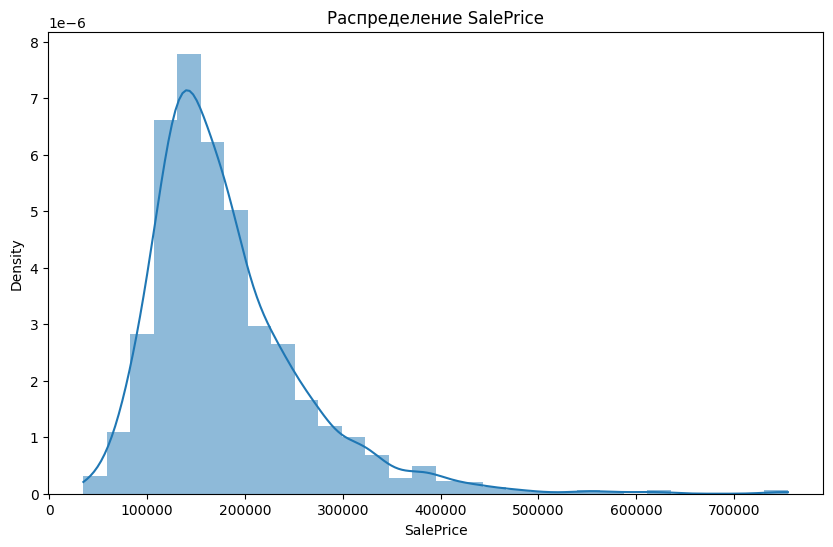

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, stat="density", linewidth=0, bins=30)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Density')

# Вычисление коэффициента эксцесса
kurtosis_value = df['SalePrice'].kurtosis()
print(f'Коэффициент эксцесса для SalePrice: {kurtosis_value:.2f}')

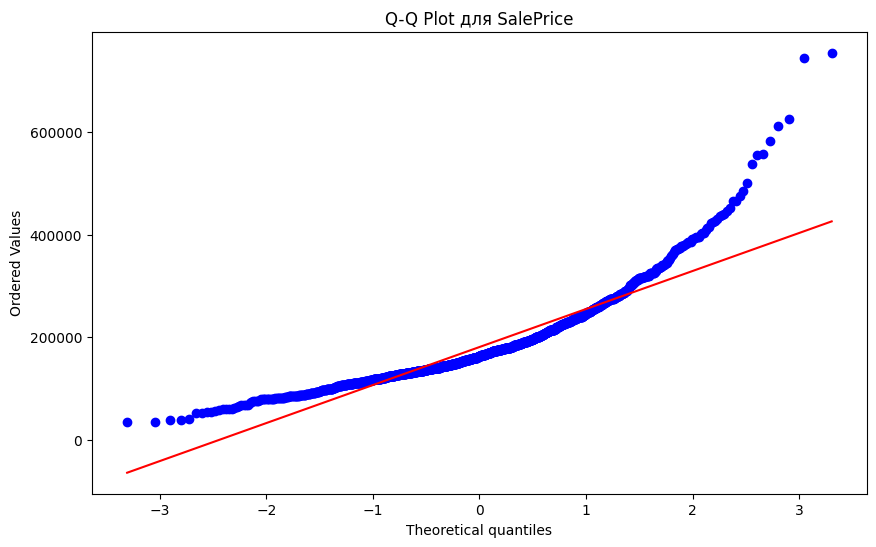

In [26]:
# Q-Q plot для проверки нормальности
plt.figure(figsize=(10, 6))
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot для SalePrice')
plt.show()

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

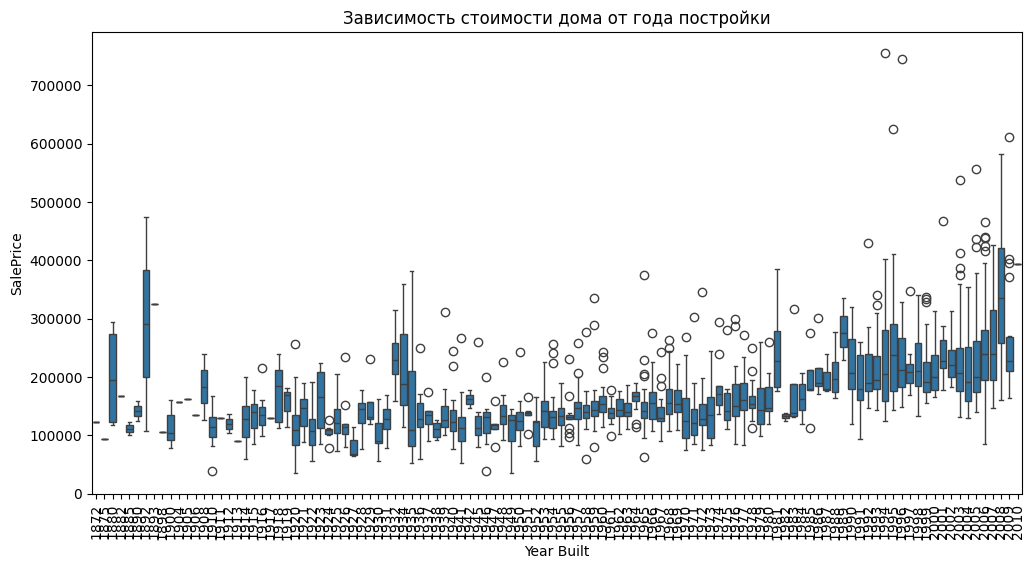

In [7]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('Зависимость стоимости дома от года постройки')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()

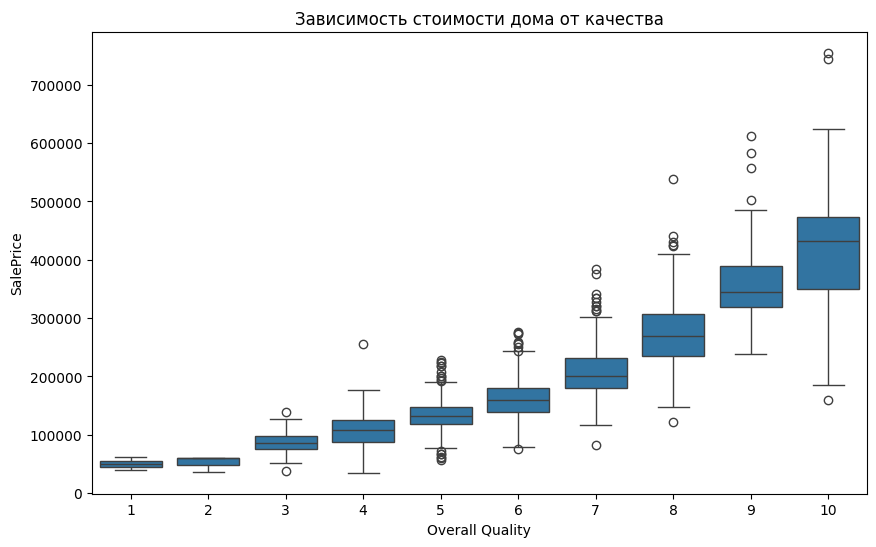

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Зависимость стоимости дома от качества')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

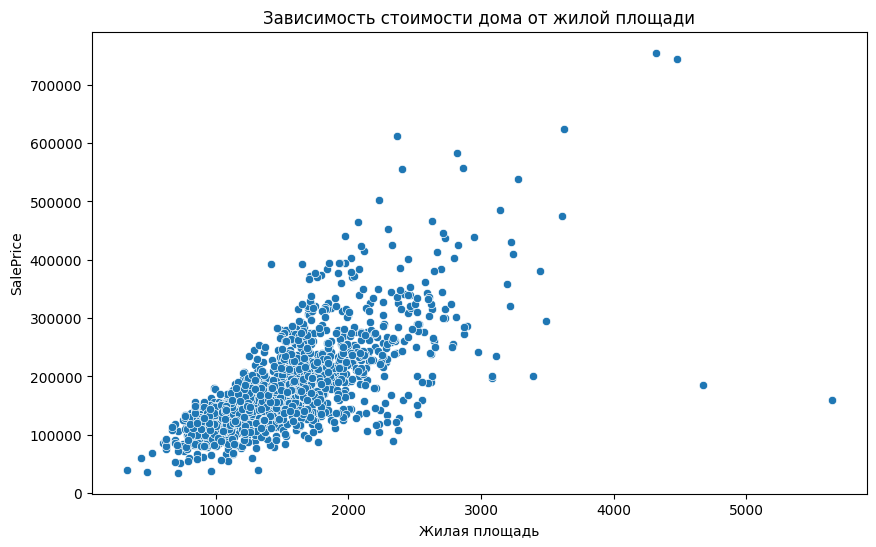

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Зависимость стоимости дома от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('SalePrice')
plt.show()

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

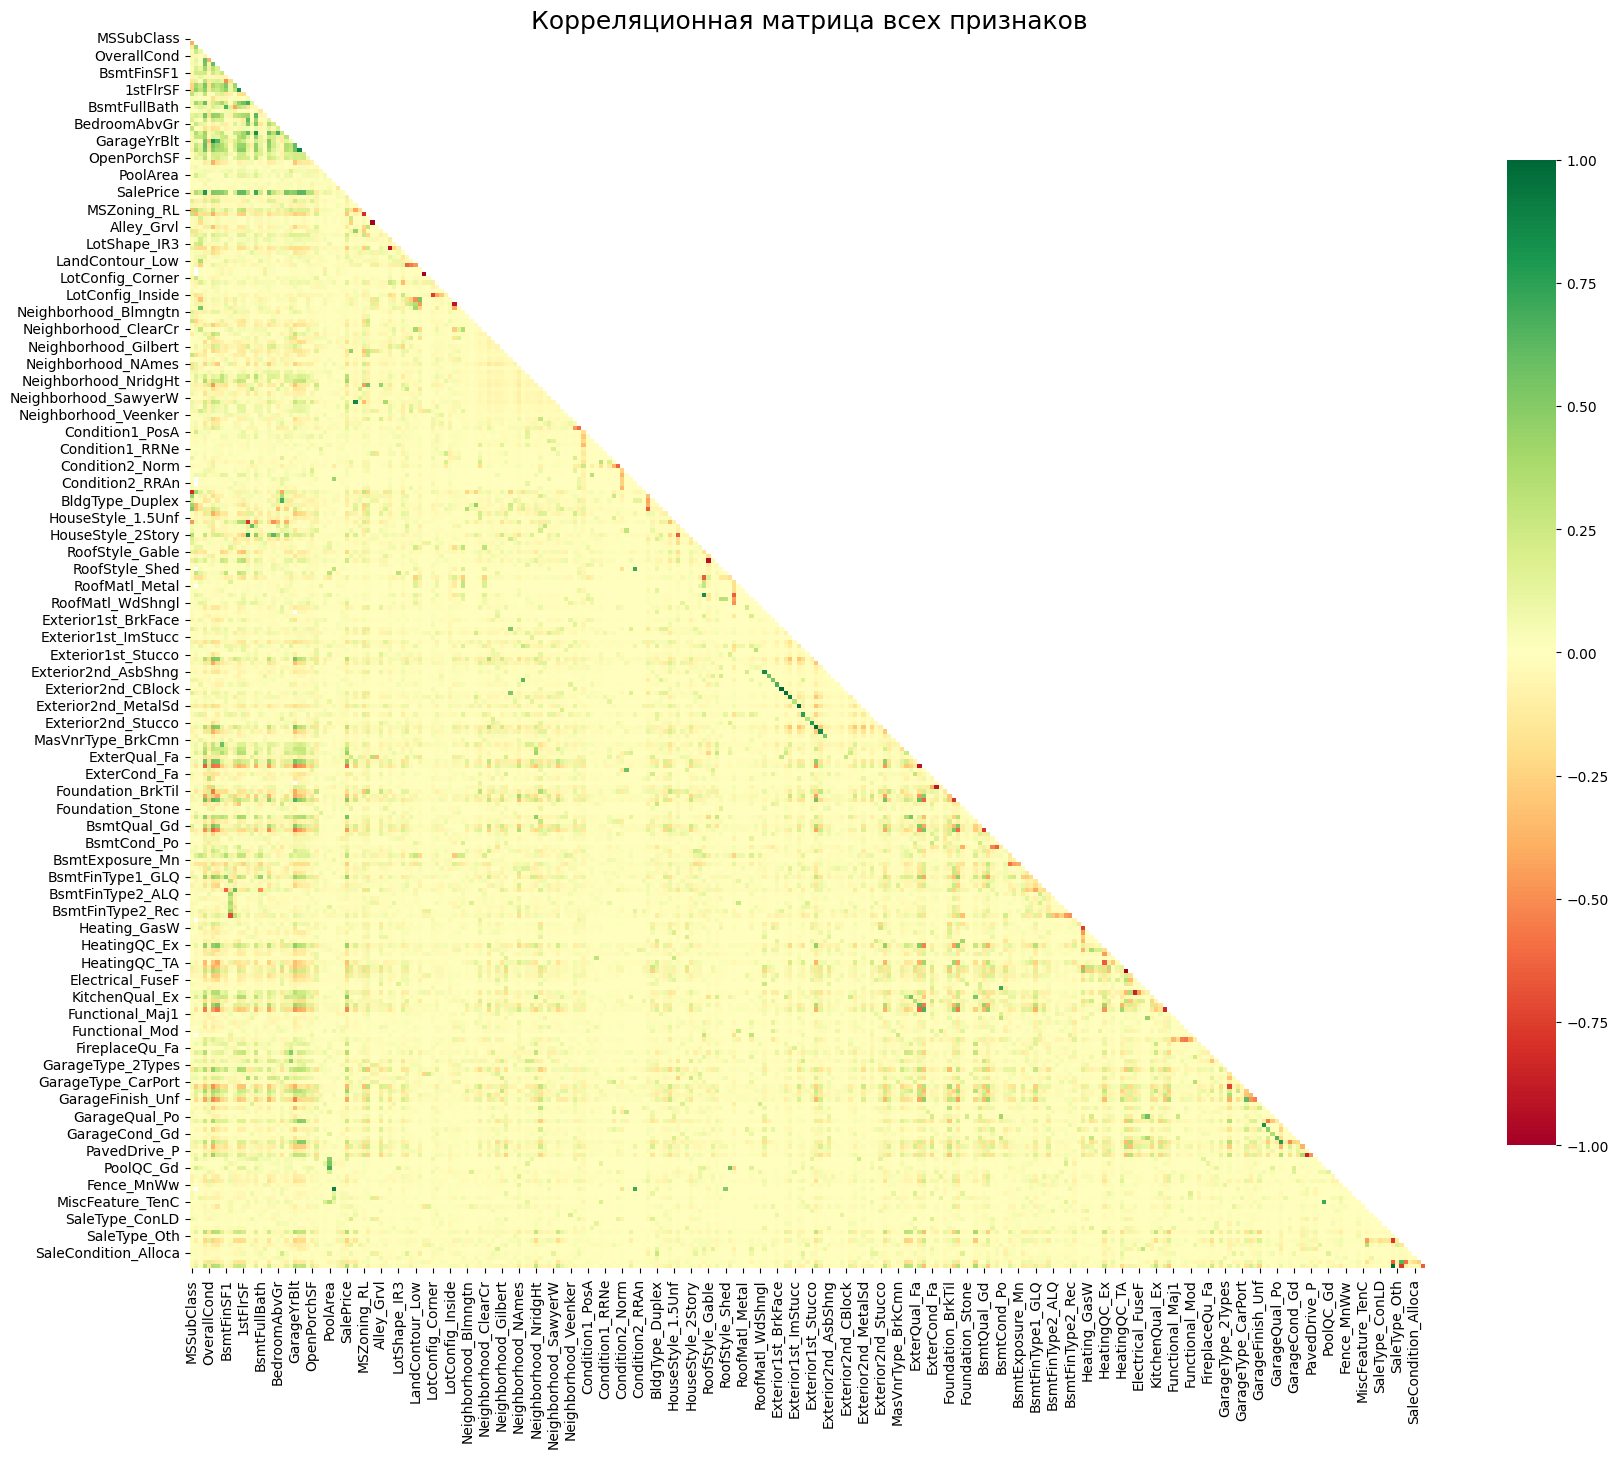

In [10]:

df_numeric = pd.get_dummies(df)

# Вычисление корреляционной матрицы
corr = df_numeric.corr()

# Создание маски для верхней треугольной части матрицы
mask = np.triu(np.ones_like(corr, dtype=bool))

# Построение heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, mask=mask, cmap='RdYlGn', annot=False, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица всех признаков', fontsize=18)
plt.show()

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной.

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции.
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

Список признаков, сильно коррелирующих с SalePrice (|corr| > 0.5):
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA']


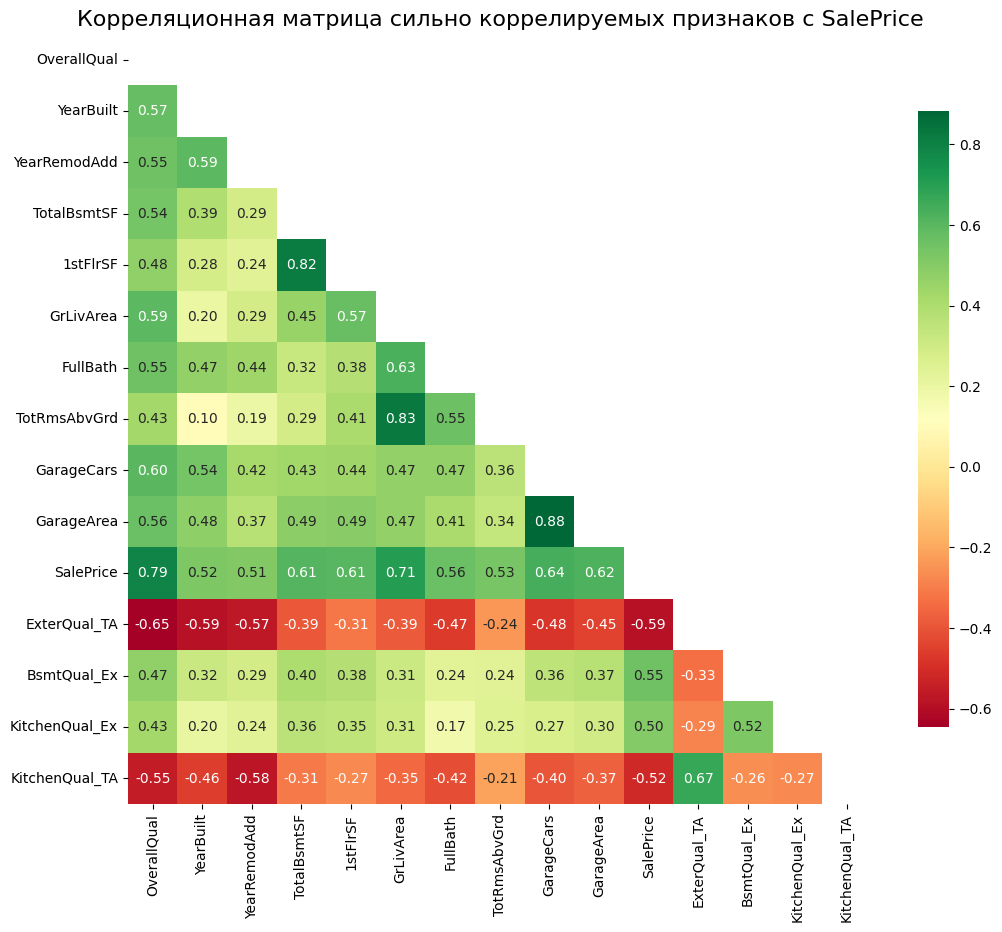

In [12]:
corr = df_numeric.corr()

strong_corr_features = corr['SalePrice'][corr['SalePrice'].abs() > 0.5].index
print("Список признаков, сильно коррелирующих с SalePrice (|corr| > 0.5):")
print(strong_corr_features.tolist())

strong_corr_matrix = df_numeric[strong_corr_features].corr()

mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(strong_corr_matrix, mask=mask, cmap='RdYlGn', annot=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Корреляционная матрица сильно коррелируемых признаков с SalePrice', fontsize=16)
plt.show()

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [14]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print('Пропущенные данные:')
print(missing_data)

missing_ratio = missing_data / df.shape[0]
print('\nДоля пропущенных данных:')
print(missing_ratio)

df = df.drop(columns=missing_ratio[missing_ratio > 0.1].index)

df = df.fillna({
    col: 'unknown' if df[col].dtype == 'object' else df[col].mean() for col in df.columns
})

Пропущенные данные:
Series([], dtype: int64)

Доля пропущенных данных:
Series([], dtype: float64)


## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [16]:
df = pd.get_dummies(df)

print(f'Количество признаков после преобразования: {df.shape[1]}')

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

Количество признаков после преобразования: 276


## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
mse_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores

mean_mse = mse_scores.mean()
print(f'Среднее значение MSE на 5 фолдах: {mean_mse:.2f}')

lr.fit(X, y)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})

coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coefficient', ascending=True)

print('\nКоэффициенты линейной регрессии:')
for idx, row in coefficients.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.2f}")

Среднее значение MSE на 5 фолдах: 35872771698370656.00

Коэффициенты линейной регрессии:
MiscVal: 0.12
LotArea: 0.76
BsmtUnfSF: -1.92
OpenPorchSF: 2.53
EnclosedPorch: 4.41
BsmtFinSF2: 7.02
WoodDeckSF: 13.41
MasVnrArea: 13.43
1stFlrSF: 15.37
BsmtFinSF1: 17.42
GarageArea: 18.38
LowQualFinSF: -19.53
MSSubClass: -19.79
TotalBsmtSF: 22.52
ScreenPorch: 28.59
GarageYrBlt: -30.18
GrLivArea: 31.15
CentralAir_N: -31.17
CentralAir_Y: 31.17
3SsnPorch: 31.41
2ndFlrSF: 35.32
Functional_Mod: 84.63
PoolArea: 85.11
YearRemodAdd: 100.63
GarageFinish_Unf: -129.43
Exterior2nd_Brk Cmn: -135.86
GarageFinish_Fin: -232.59
YearBuilt: 316.05
GarageType_BuiltIn: -321.41
YrSold: -328.28
Exterior2nd_Wd Shng: 399.51
Heating_Grav: -399.90
Neighborhood_Blmngtn: 421.54
LandContour_Bnk: -428.95
MoSold: -446.94
PavedDrive_N: 580.60
BsmtFullBath: 603.67
BsmtFinType1_Unf: 620.33
PavedDrive_Y: 663.74
GarageType_Attchd: 765.14
BsmtFinType1_BLQ: -836.53
HalfBath: 850.27
HeatingQC_Fa: 865.76
BsmtHalfBath: -922.79
Exterior1st_

К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

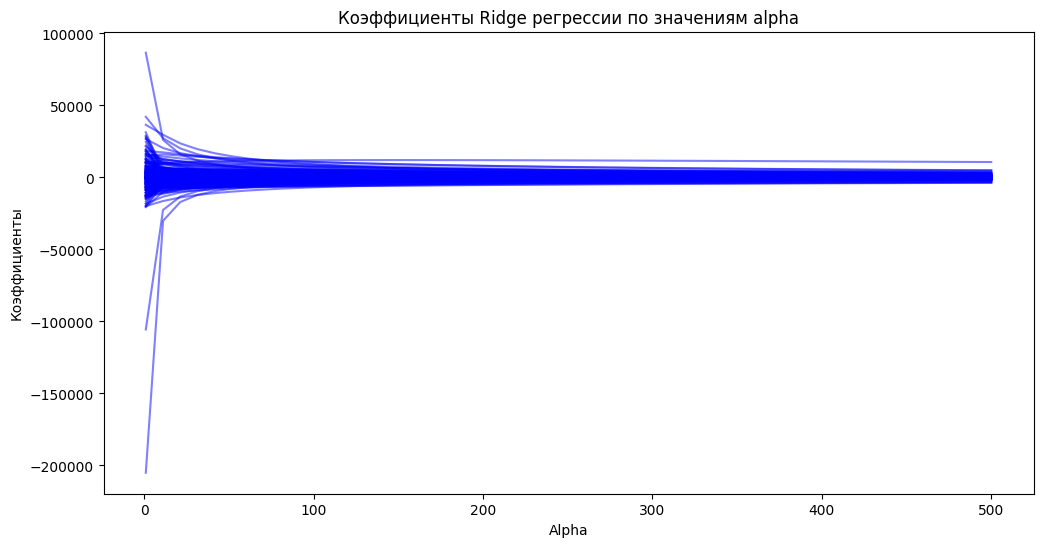

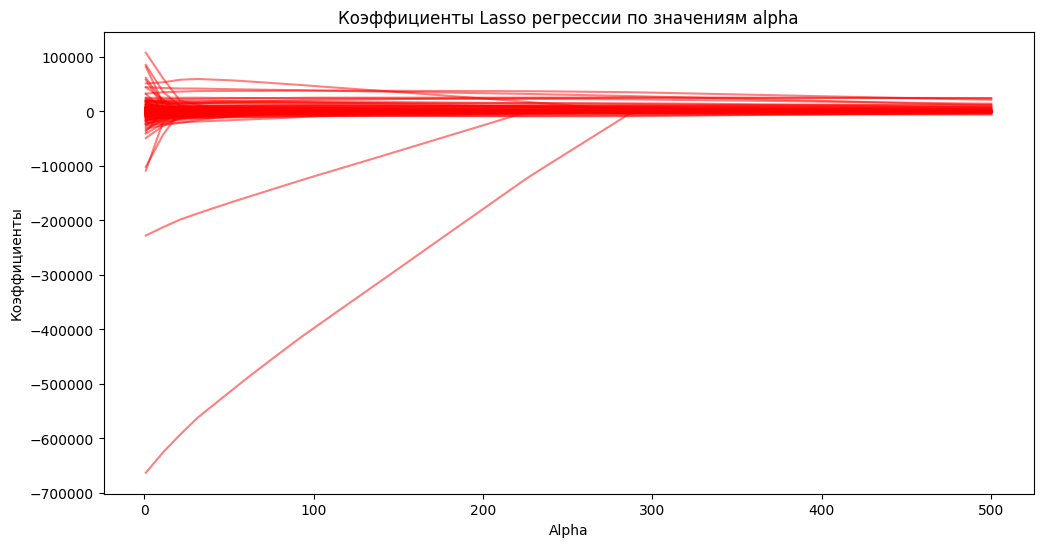

In [18]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.linspace(1, 500, 50)

ridge_coefficients = []
lasso_coefficients = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    ridge_coefficients.append(ridge.coef_)

    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    lasso_coefficients.append(lasso.coef_)

ridge_coefficients = np.array(ridge_coefficients)
lasso_coefficients = np.array(lasso_coefficients)

plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, ridge_coefficients[:, i], label=X.columns[i] if i < 3 else "", color='blue', alpha=0.5)
plt.title('Коэффициенты Ridge регрессии по значениям alpha')
plt.xlabel('Alpha')
plt.ylabel('Коэффициенты')
plt.show()

plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.plot(alphas, lasso_coefficients[:, i], label=X.columns[i] if i < 3 else "", color='red', alpha=0.5)
plt.title('Коэффициенты Lasso регрессии по значениям alpha')
plt.xlabel('Alpha')
plt.ylabel('Коэффициенты')
plt.show()

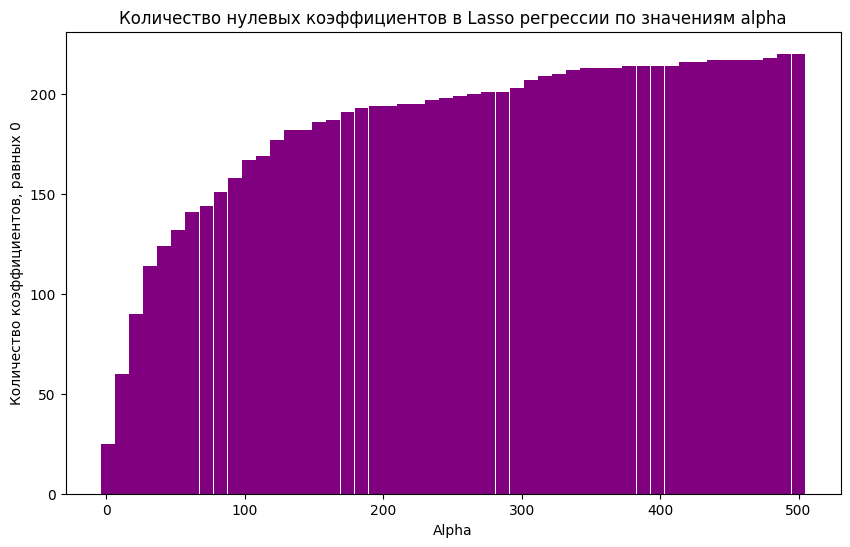

In [19]:
zero_coefficients = (np.abs(lasso_coefficients) < 0.0001).sum(axis=1)

plt.figure(figsize=(10, 6))
plt.bar(alphas, zero_coefficients, width=10, color='purple')
plt.title('Количество нулевых коэффициентов в Lasso регрессии по значениям alpha')
plt.xlabel('Alpha')
plt.ylabel('Количество коэффициентов, равных 0')
plt.show()

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

Оптимальное значение alpha для Lasso: 143.57


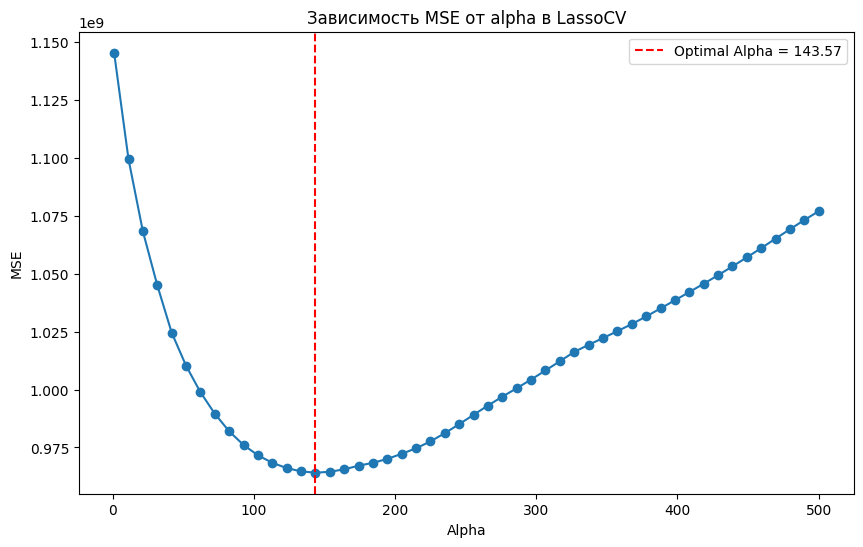

Количество ненулевых коэффициентов: 94


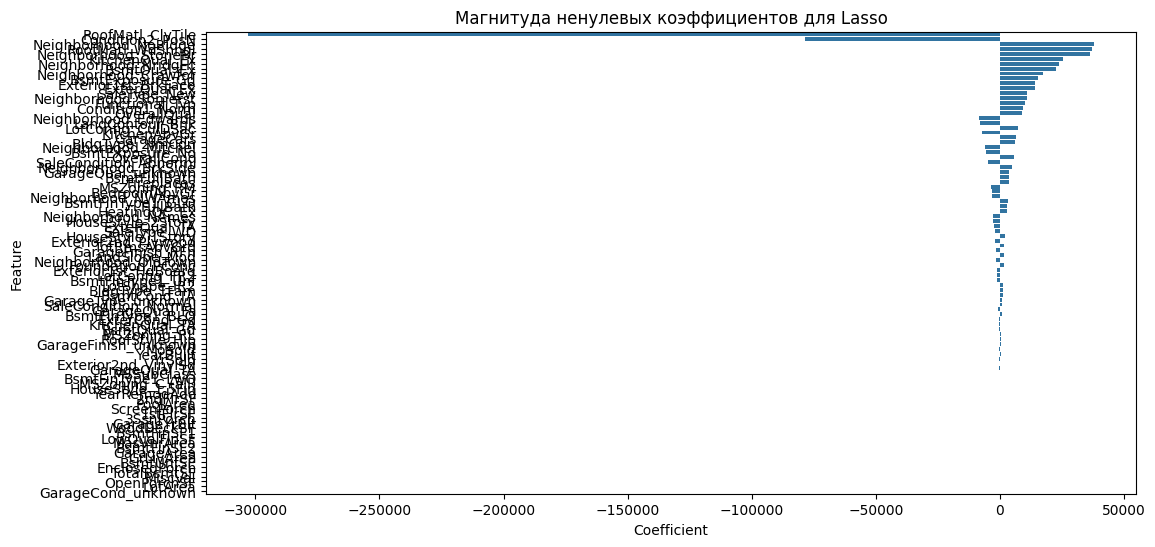

Среднее значение MSE на 5 фолдах для LassoCV: 995323551.75


In [20]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=np.linspace(1, 500, 50), cv=5, max_iter=10000)
lasso_cv.fit(X, y)

optimal_alpha = lasso_cv.alpha_
print(f'Оптимальное значение alpha для Lasso: {optimal_alpha:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), marker='o')
plt.axvline(optimal_alpha, linestyle='--', color='r', label=f'Optimal Alpha = {optimal_alpha:.2f}')
plt.title('Зависимость MSE от alpha в LassoCV')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

non_zero_coefficients = np.sum(lasso_cv.coef_ != 0)
print(f'Количество ненулевых коэффициентов: {non_zero_coefficients}')

sorted_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_cv.coef_})
sorted_coefficients = sorted_coefficients[sorted_coefficients['Coefficient'] != 0].sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coefficients)
plt.title('Магнитуда ненулевых коэффициентов для Lasso')
plt.show()

lasso_mse_scores = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_mean_mse = -lasso_mse_scores.mean()
print(f'Среднее значение MSE на 5 фолдах для LassoCV: {lasso_mean_mse:.2f}')

## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(f'Размер X_train: {X_train.shape}, Размер X_test: {X_test.shape}')


Размер X_train: (978, 275), Размер X_test: (482, 275)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [22]:
lasso_cv.fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

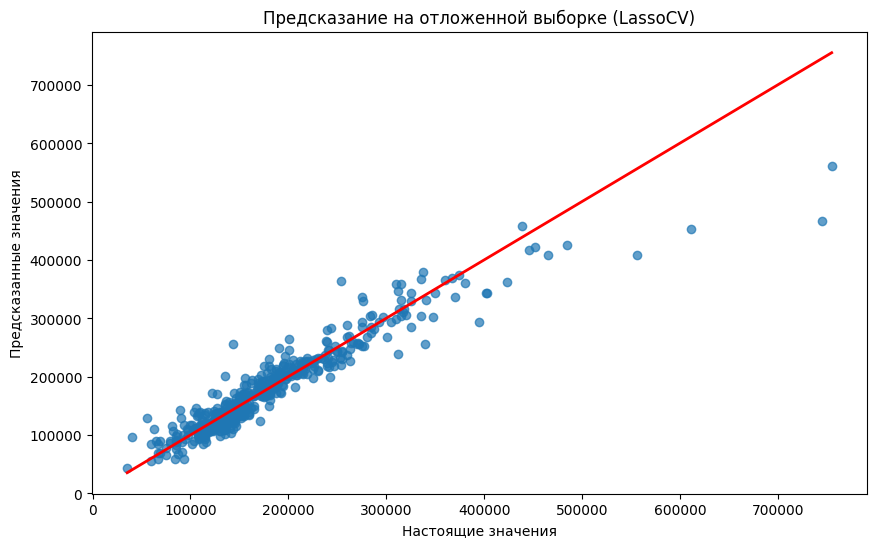

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказание на отложенной выборке (LassoCV)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=2)
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

strong_corr_features = corr['SalePrice'][corr['SalePrice'].abs() > 0.5].index.drop('SalePrice')
X_limited = df_numeric[strong_corr_features]
y_limited = df_numeric['SalePrice']

lasso_limited = Lasso(alpha=1)
limited_mse_scores = cross_val_score(lasso_limited, X_limited, y_limited, cv=5, scoring='neg_mean_squared_error')
limited_mean_mse = -limited_mse_scores.mean()
print(f'Среднее значение MSE на 5 фолдах для ограниченной версии: {limited_mean_mse:.2f}')

Среднее значение MSE на 5 фолдах для ограниченной версии: 1343952299.54


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.